In [1]:
import pandas as pd
import scanpy as sc
import anndata
import CococoNet_reader
import h5py
import numpy as np

In [2]:
arabi_cccnt = CococoNet_reader.read_cococonet('arabidopsis')

In [3]:
arabidopsis_matrix_panda = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Arabidopsis/mol_plant_paper/annotated_from_github/norm_data_arabidopsis.csv')
arabidopsis_matrix_panda = arabidopsis_matrix_panda.T
arabidopsis_matrix_panda

AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
AAACCTGAGAATTCCC       0.00        0.0        0.0        1.3       1.30   
AAACCTGAGGGCACTA       0.00        0.0        0.0        0.0       1.53   
AAACCTGAGTAATCCC       0.00        0.0        0.0        0.0       0.00   
AAACCTGAGTACGTTC       1.41        0.0        0.0        0.0       0.00   
AAACCTGAGTATTGGA       0.00        0.0        0.0        0.0       2.17   
...                     ...        ...        ...        ...        ...   
TTTGTCATCAAGGCTT       0.00        0.0        0.0        0.0       0.00   
TTTGTCATCCCACTTG       0.00        0.0        0.0        0.0       0.00   
TTTGTCATCCTGCCAT       0.00        0.0        0.0        0.0       1.03   
TTTGTCATCCTTCAAT       1.68        0.0        0.0        0.0       1.68   
TTTGTCATCTCTGCTG       0.93        0.0        0.0        0.0       1.97   

                  AT1G01060  AT1G01070  AT1G01080  AT1G01090  AT1G01100  ...  \
AAACCTGAGAATTCCC       1.30       0.00        0.0       1.30       3.11  ...   
AAACCTGAGGGCACTA       0.00       0.00        0.0       0.00       0.00  ...   
AAACCTGAGTAATCCC       1.62       0.00        0.0       0.00       0.00  ...   
AAACCTGAGTACGTTC       0.00       0.00        0.0       0.00       1.41  ...   
AAACCTGAGTATTGGA       0.00       0.00        0.0       0.00       1.82  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGTCATCAAGGCTT       0.00       0.00        0.0       0.00       0.00  ...   
TTTGTCATCCCACTTG       0.00       0.00        0.0       1.26       0.00  ...   
TTTGTCATCCTGCCAT       0.00       0.00        0.0       0.00       2.30  ...   
TTTGTCATCCTTCAAT       0.00       0.00        0.0       0.00       0.00  ...   
TTTGTCATCTCTGCTG       0.00       0.93        0.0       0.93       0.00  ...   

                  ATMG01200  ATMG01220  ATMG01280  ATMG01320  ATMG01330  \
AAACCTGAGAATTCCC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGGGCACTA        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTAATCCC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTACGTTC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTATTGGA        0.0        0.0        0.0        0.0        0.0   
...                     ...        ...        ...        ...        ...   
TTTGTCATCAAGGCTT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCCACTTG        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCTGCCAT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCTTCAAT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCTCTGCTG        0.0        0.0        0.0        0.0        0.0   

                  ATMG01350  ATMG01360  ATMG01370  ATMG01390  ATMG01410  
AAACCTGAGAATTCCC        0.0       1.85        1.3       1.85        0.0  
AAACCTGAGGGCACTA        0.0       0.00        0.0       2.11        0.0  
AAACCTGAGTAATCCC        0.0       0.00        0.0       0.00        0.0  
AAACCTGAGTACGTTC        0.0       0.00        0.0       0.00        0.0  
AAACCTGAGTATTGGA        0.0       0.00        0.0       0.00        0.0  
...                     ...        ...        ...        ...        ...  
TTTGTCATCAAGGCTT        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCCACTTG        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCTGCCAT        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCTTCAAT        0.0       0.00        0.0       1.68        0.0  
TTTGTCATCTCTGCTG        0.0       1.97        0.0       0.93        0.0  

[7695 rows x 23161 columns]

In [4]:
primary_Dataset = anndata.AnnData(X = arabidopsis_matrix_panda.values, obs = arabidopsis_matrix_panda.index.to_list(), var = arabidopsis_matrix_panda.columns.to_list())
primary_Dataset

/tmp/ipykernel_1135564/4151786370.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  primary_Dataset = anndata.AnnData(X = arabidopsis_matrix_panda.values, obs = arabidopsis_matrix_panda.index.to_list(), var = arabidopsis_matrix_panda.columns.to_list())


AnnData object with n_obs × n_vars = 7695 × 23161
    obs: 0
    var: 0

In [5]:
primary_Dataset.var.columns = ['Gene Name']
primary_Dataset.var = primary_Dataset.var.reindex(primary_Dataset.var['Gene Name'])
primary_Dataset.obs.columns = ['Barcode']
primary_Dataset.obs = primary_Dataset.obs.reindex(primary_Dataset.obs['Barcode'])

In [6]:
primary_Dataset.var['In CoCoCoNet'] = 0
primary_Dataset.var['In CoCoCoNet'].loc[primary_Dataset.var.index.isin(arabi_cccnt.index)] = 1
primary_Dataset = primary_Dataset[:,primary_Dataset.var['In CoCoCoNet'] == 1]
primary_Dataset

/tmp/ipykernel_1135564/442019263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_Dataset.var['In CoCoCoNet'].loc[primary_Dataset.var.index.isin(arabi_cccnt.index)] = 1


View of AnnData object with n_obs × n_vars = 7695 × 19895
    obs: 'Barcode'
    var: 'Gene Name', 'In CoCoCoNet'

In [7]:
matrix_secondary_set = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Arabidopsis/dev_cell_not_wang/GSE123818_Root_single_cell_wt_datamatrix.csv', index_col= 0)
matrix_secondary_set = matrix_secondary_set.T

In [8]:
matrix_secondary_set

AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
AAACCTGCACTTAACG-1          0          0          0          0          0   
AAACCTGCAGGACGTA-1          0          1          0          0          3   
AAACCTGTCAGGTAAA-1          0          0          0          0          1   
AAACGGGCAATAGAGT-1          0          1          0          1         89   
AAACGGGCACTTGGAT-1          1          4          1          1         57   
...                       ...        ...        ...        ...        ...   
TTTGTCACACTGTTAG-2          0          0          0          1          0   
TTTGTCACATCCTTGC-2          0          1          0          0          3   
TTTGTCAGTTGTCTTT-2          1          0          0          0          7   
TTTGTCATCACCGTAA-2          0          2          0          0          3   
TTTGTCATCGAATCCA-2          0          1          0          0          0   

                    AT1G01060  AT1G01070  AT1G01080  AT1G01090  AT1G01100  \
AAACCTGCACTTAACG-1          0          0          0          0          2   
AAACCTGCAGGACGTA-1          0          0          0          1         10   
AAACCTGTCAGGTAAA-1          0          0          0          0          1   
AAACGGGCAATAGAGT-1          1          0          0         20        286   
AAACGGGCACTTGGAT-1          2          0          0          8        173   
...                       ...        ...        ...        ...        ...   
TTTGTCACACTGTTAG-2          4          0          0          1         11   
TTTGTCACATCCTTGC-2          1          0          0          0          3   
TTTGTCAGTTGTCTTT-2          0          0          0          6         41   
TTTGTCATCACCGTAA-2          0          0          0          4         89   
TTTGTCATCGAATCCA-2          0          0          0          1          0   

                    ...  ATCG01120  ATCG01130  ATCG01230  ATCG01240  \
AAACCTGCACTTAACG-1  ...          0          1          0          0   
AAACCTGCAGGACGTA-1  ...          0          1          0          0   
AAACCTGTCAGGTAAA-1  ...          0          1          0          0   
AAACGGGCAATAGAGT-1  ...          0          5          0          0   
AAACGGGCACTTGGAT-1  ...          0          2          0          0   
...                 ...        ...        ...        ...        ...   
TTTGTCACACTGTTAG-2  ...          0          0          0          0   
TTTGTCACATCCTTGC-2  ...          0          0          0          0   
TTTGTCAGTTGTCTTT-2  ...          0          3          0          0   
TTTGTCATCACCGTAA-2  ...          0         30          0          0   
TTTGTCATCGAATCCA-2  ...          0          0          0          0   

                    ATCG01250  ATCG01270  ATCG01280  ATCG01300  ATCG01310  GFP  
AAACCTGCACTTAACG-1          0          0          0          0          0    0  
AAACCTGCAGGACGTA-1          0          0          0          0          0    0  
AAACCTGTCAGGTAAA-1          0          0          0          0          0    0  
AAACGGGCAATAGAGT-1          0          0          0          0          0    0  
AAACGGGCACTTGGAT-1          0          0          0          0          0    0  
...                       ...        ...        ...        ...        ...  ...  
TTTGTCACACTGTTAG-2          0          0          0          0          0    0  
TTTGTCACATCCTTGC-2          0          0          0          0          0    0  
TTTGTCAGTTGTCTTT-2          0          0          0          0          0    0  
TTTGTCATCACCGTAA-2          0          0          0          0          0    0  
TTTGTCATCGAATCCA-2          0          0          0          0          0    0  

[4727 rows x 27629 columns]

In [9]:
secondary_sc_set = anndata.AnnData(X = matrix_secondary_set.values, obs = matrix_secondary_set.index.to_list(), var = matrix_secondary_set.columns.to_list())
secondary_sc_set.var.columns = ['Gene Name']
secondary_sc_set.var = secondary_sc_set.var.reindex(secondary_sc_set.var['Gene Name'])
secondary_sc_set.obs.columns = ['Barcode']
secondary_sc_set.obs = secondary_sc_set.obs.reindex(secondary_sc_set.obs['Barcode'])


/tmp/ipykernel_1135564/4279404711.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  secondary_sc_set = anndata.AnnData(X = matrix_secondary_set.values, obs = matrix_secondary_set.index.to_list(), var = matrix_secondary_set.columns.to_list())


In [10]:
secondary_sc_set.var['In CoCoCoNet'] = 0
secondary_sc_set.var['In CoCoCoNet'].loc[secondary_sc_set.var.index.isin(arabi_cccnt.index)] = 1
secondary_sc_set = secondary_sc_set[:,secondary_sc_set.var['In CoCoCoNet'] == 1]
secondary_sc_set

/tmp/ipykernel_1135564/1673202152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondary_sc_set.var['In CoCoCoNet'].loc[secondary_sc_set.var.index.isin(arabi_cccnt.index)] = 1


View of AnnData object with n_obs × n_vars = 4727 × 20478
    obs: 'Barcode'
    var: 'Gene Name', 'In CoCoCoNet'

In [11]:
genes_in_primary = primary_Dataset.var_names.to_list()
genes_in_secondary = secondary_sc_set.var_names.to_list()
overlap_Genes = list(set(genes_in_primary).intersection(genes_in_secondary))
print(len(overlap_Genes))

19679


In [12]:
primary_Dataset = primary_Dataset[:,overlap_Genes]
secondary_sc_set = secondary_sc_set[:,overlap_Genes]

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


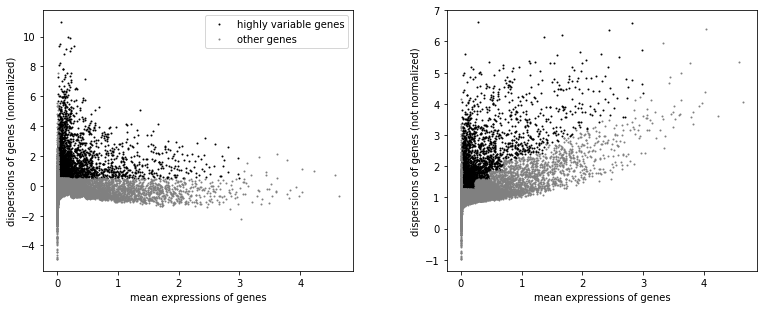

In [13]:
sc.pp.highly_variable_genes(primary_Dataset, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(primary_Dataset)


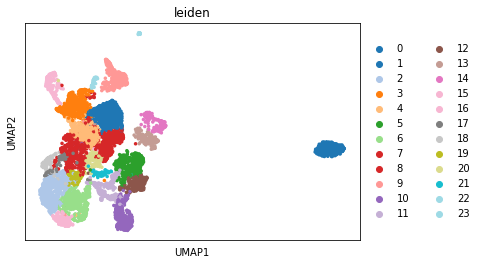

In [14]:
sc.tl.pca(primary_Dataset, svd_solver='arpack', random_state= 331)
sc.pp.neighbors(primary_Dataset, n_neighbors=20, n_pcs=50, random_state= 43)
sc.tl.umap(primary_Dataset, random_state= 1154)
sc.tl.leiden(primary_Dataset, random_state= 542)

sc.pl.umap(primary_Dataset, color = 'leiden',palette= 'tab20', s=50)

In [15]:
umap_df = pd.DataFrame(data = primary_Dataset.obsm['X_umap'], columns = ['Axis 1','Axis 2'], index = primary_Dataset.obs.index)
umap_df

Axis 1     Axis 2
Barcode                               
AAACCTGAGAATTCCC  -3.047752   5.708016
AAACCTGAGGGCACTA  28.145908   7.351687
AAACCTGAGTAATCCC   2.676087  -1.386654
AAACCTGAGTACGTTC   2.401948   0.979046
AAACCTGAGTATTGGA  -1.776340   8.380715
...                     ...        ...
TTTGTCATCAAGGCTT  -1.677783   8.845328
TTTGTCATCCCACTTG   1.013128  17.029860
TTTGTCATCCTGCCAT  -1.276303   6.308894
TTTGTCATCCTTCAAT  27.820450   6.651030
TTTGTCATCTCTGCTG   1.075652  11.852083

[7695 rows x 2 columns]

In [16]:
barcode_csv = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Arabidopsis/mol_plant_paper/annotated_from_github/barcodes.csv', index_col= 0)


clusters_to_label = {0:'Phloem/Pericycle -1 P',
    1:'Sub-cell Stele - Discarded P',
    2:'Sub-cell type of stele P',
    3:'Columella Root Cap P',
    4:'Lateral Root Cap P',
    5:'Unknown -6 P',
    6:'Phloem/Pericycle-7 P',
    7:'Root Hair -8 P',
    8:'Phloem P',
    9:'Endodermis (CS+) -10 P',
    10:'Unknown-11 P',
    11:'Stem Cell Niche -12 P',
    12:'Endodermis P',
    13:'Proximal Meristem P',
    14:'Xylem P',
    15:'Sub Cell Type of RC P',
    16:'Root Hair - 17 P',
    17:'Epidermis P',
    18:'Stem Cell Niche - 19 P',
    19:'Proto/Meta-Phloem P',
    20:'Lateral Root P',
    21:'Endodermis (CS+) P',
    22:'Mature Cortex P',
    23:'Photsynthetic Cell P'}

In [17]:
barcode_csv

cluster
barcode                  
AAACCTGAGAATTCCC       11
AAACCTGAGGGCACTA        1
AAACCTGAGTAATCCC        7
AAACCTGAGTACGTTC       16
AAACCTGAGTATTGGA       13
...                   ...
TTTGTCATCAAGGCTT        2
TTTGTCATCCCACTTG       14
TTTGTCATCCTGCCAT        2
TTTGTCATCCTTCAAT        1
TTTGTCATCTCTGCTG        9

[7695 rows x 1 columns]

In [18]:
barcode_csv['Cluster Identity'] =barcode_csv['cluster'].map(clusters_to_label)
barcode_csv

cluster              Cluster Identity
barcode                                                
AAACCTGAGAATTCCC       11         Stem Cell Niche -12 P
AAACCTGAGGGCACTA        1  Sub-cell Stele - Discarded P
AAACCTGAGTAATCCC        7                Root Hair -8 P
AAACCTGAGTACGTTC       16              Root Hair - 17 P
AAACCTGAGTATTGGA       13           Proximal Meristem P
...                   ...                           ...
TTTGTCATCAAGGCTT        2      Sub-cell type of stele P
TTTGTCATCCCACTTG       14                       Xylem P
TTTGTCATCCTGCCAT        2      Sub-cell type of stele P
TTTGTCATCCTTCAAT        1  Sub-cell Stele - Discarded P
TTTGTCATCTCTGCTG        9        Endodermis (CS+) -10 P

[7695 rows x 2 columns]

In [19]:
barcode_csv.value_counts(subset = 'cluster')

cluster
0     863
1     819
2     625
3     584
4     583
5     515
6     463
7     386
8     385
9     331
10    289
11    283
12    268
13    193
14    178
15    142
16    121
17    118
18    118
19    114
20     94
21     91
22     86
23     46
dtype: int64

In [20]:
primary_Dataset.obs = primary_Dataset.obs.merge( left_index= True, right_index=True, right= barcode_csv)

In [21]:
umap_df.sort_values(by = 'Axis 1', ascending= False).head(830)

Axis 1    Axis 2
Barcode                              
CGCTTCAGTTCCCTTG  30.541134  7.082860
CGCGGTAGTCATATGC  30.530361  7.049625
GCTTGAAGTTATCACG  30.476774  7.129187
TAGACCACACCTCGTT  30.456425  7.118744
GGATTACGTAAGAGAG  30.427874  6.948036
...                     ...       ...
TGCGTGGAGTGACATA  27.079618  6.434037
CCGGGATAGACAGACC  27.068115  6.787889
TCAGCTCTCCTAGTGA  26.933697  6.984753
GATGCTAAGTGCCATT  26.920433  6.813156
CTACGTCGTTCTGGTA  26.874084  6.633509

[830 rows x 2 columns]

In [22]:
primary_Dataset.obs

Barcode leiden  cluster              Cluster Identity
Barcode                                                               
AAACCTGAGAATTCCC     NaN      7       11         Stem Cell Niche -12 P
AAACCTGAGGGCACTA     NaN      1        1  Sub-cell Stele - Discarded P
AAACCTGAGTAATCCC     NaN     10        7                Root Hair -8 P
AAACCTGAGTACGTTC     NaN     11       16              Root Hair - 17 P
AAACCTGAGTATTGGA     NaN      4       13           Proximal Meristem P
...                  ...    ...      ...                           ...
TTTGTCATCAAGGCTT     NaN      4        2      Sub-cell type of stele P
TTTGTCATCCCACTTG     NaN      9       14                       Xylem P
TTTGTCATCCTGCCAT     NaN     20        2      Sub-cell type of stele P
TTTGTCATCCTTCAAT     NaN      1        1  Sub-cell Stele - Discarded P
TTTGTCATCTCTGCTG     NaN      0        9        Endodermis (CS+) -10 P

[7695 rows x 4 columns]

In [23]:
# bad_values =umap_df.sort_values(by = 'Axis 1', ascending= False).head(831).index
# good_obs = primary_Dataset.obs.loc[~primary_Dataset.obs.index.isin(bad_values)]
# primary_Dataset  = primary_Dataset[good_obs.index,:]

In [24]:
sc.set_figure_params(facecolor = 'white', figsize = (10,10))

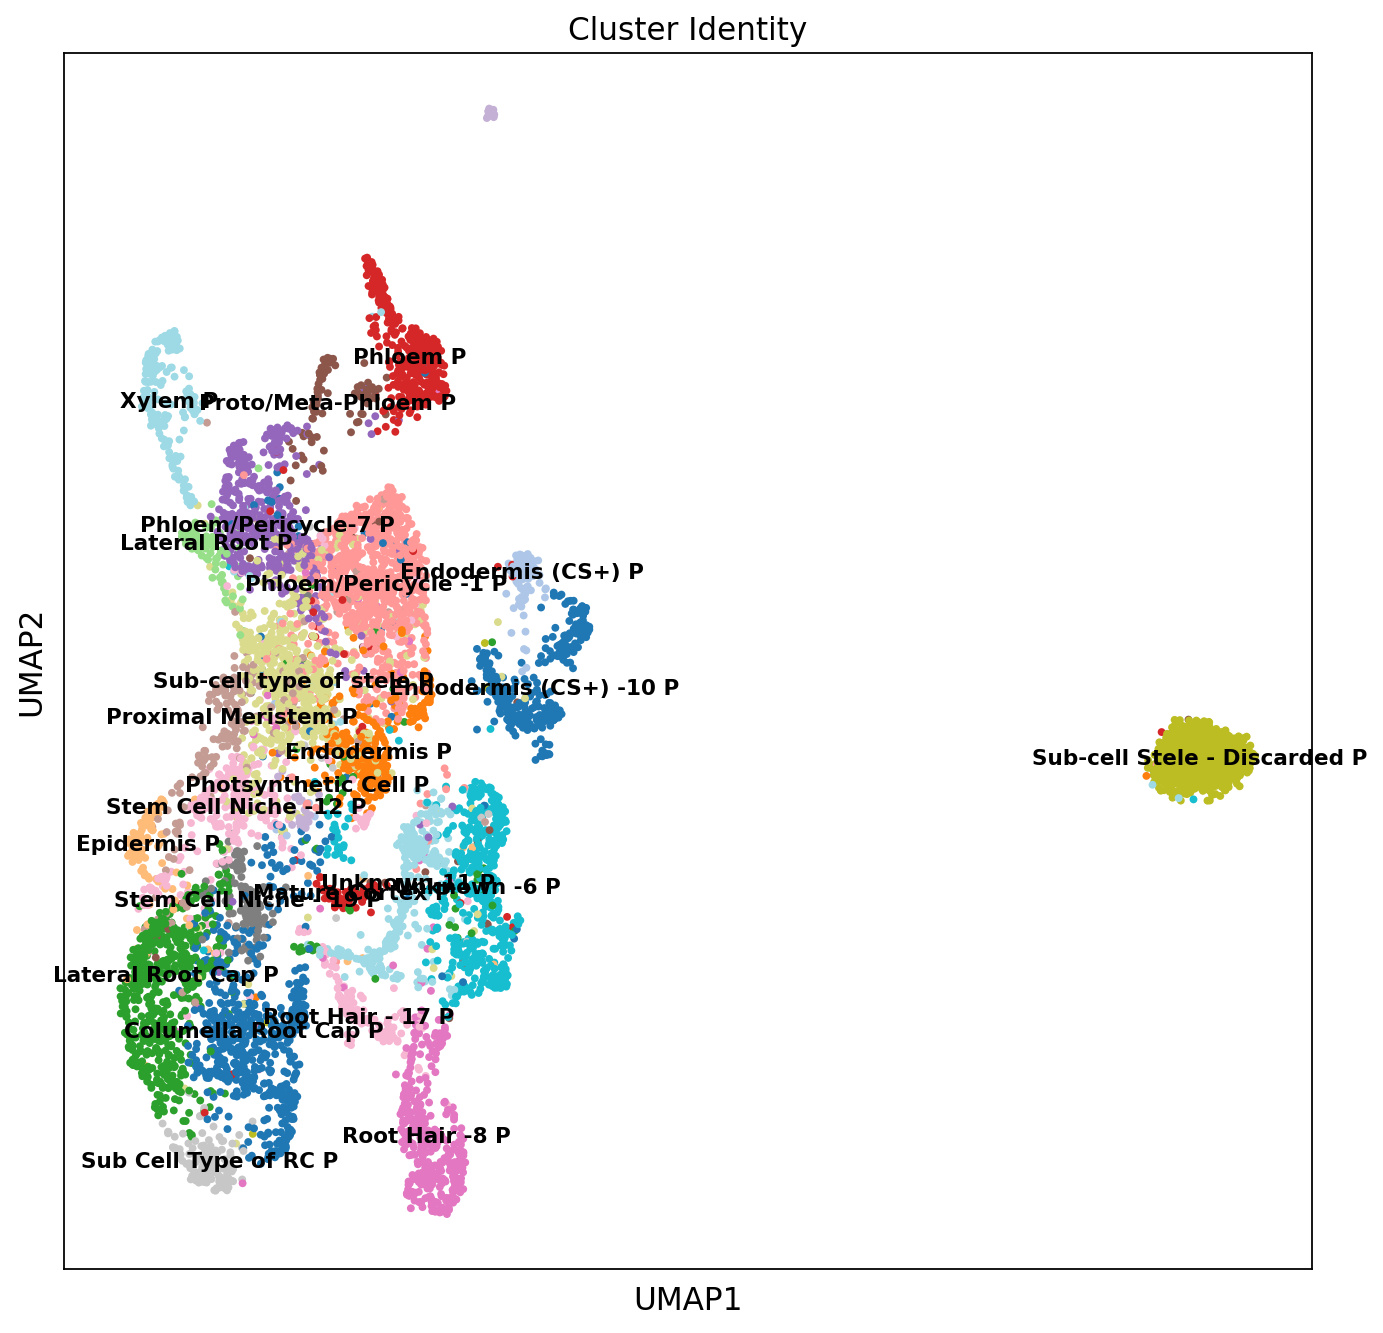

In [25]:
sc.pl.umap(primary_Dataset, color = 'Cluster Identity',palette= 'tab20', s=50, legend_loc= 'on data', legend_fontsize='x-small')

In [26]:
sc.pp.log1p(secondary_sc_set)


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


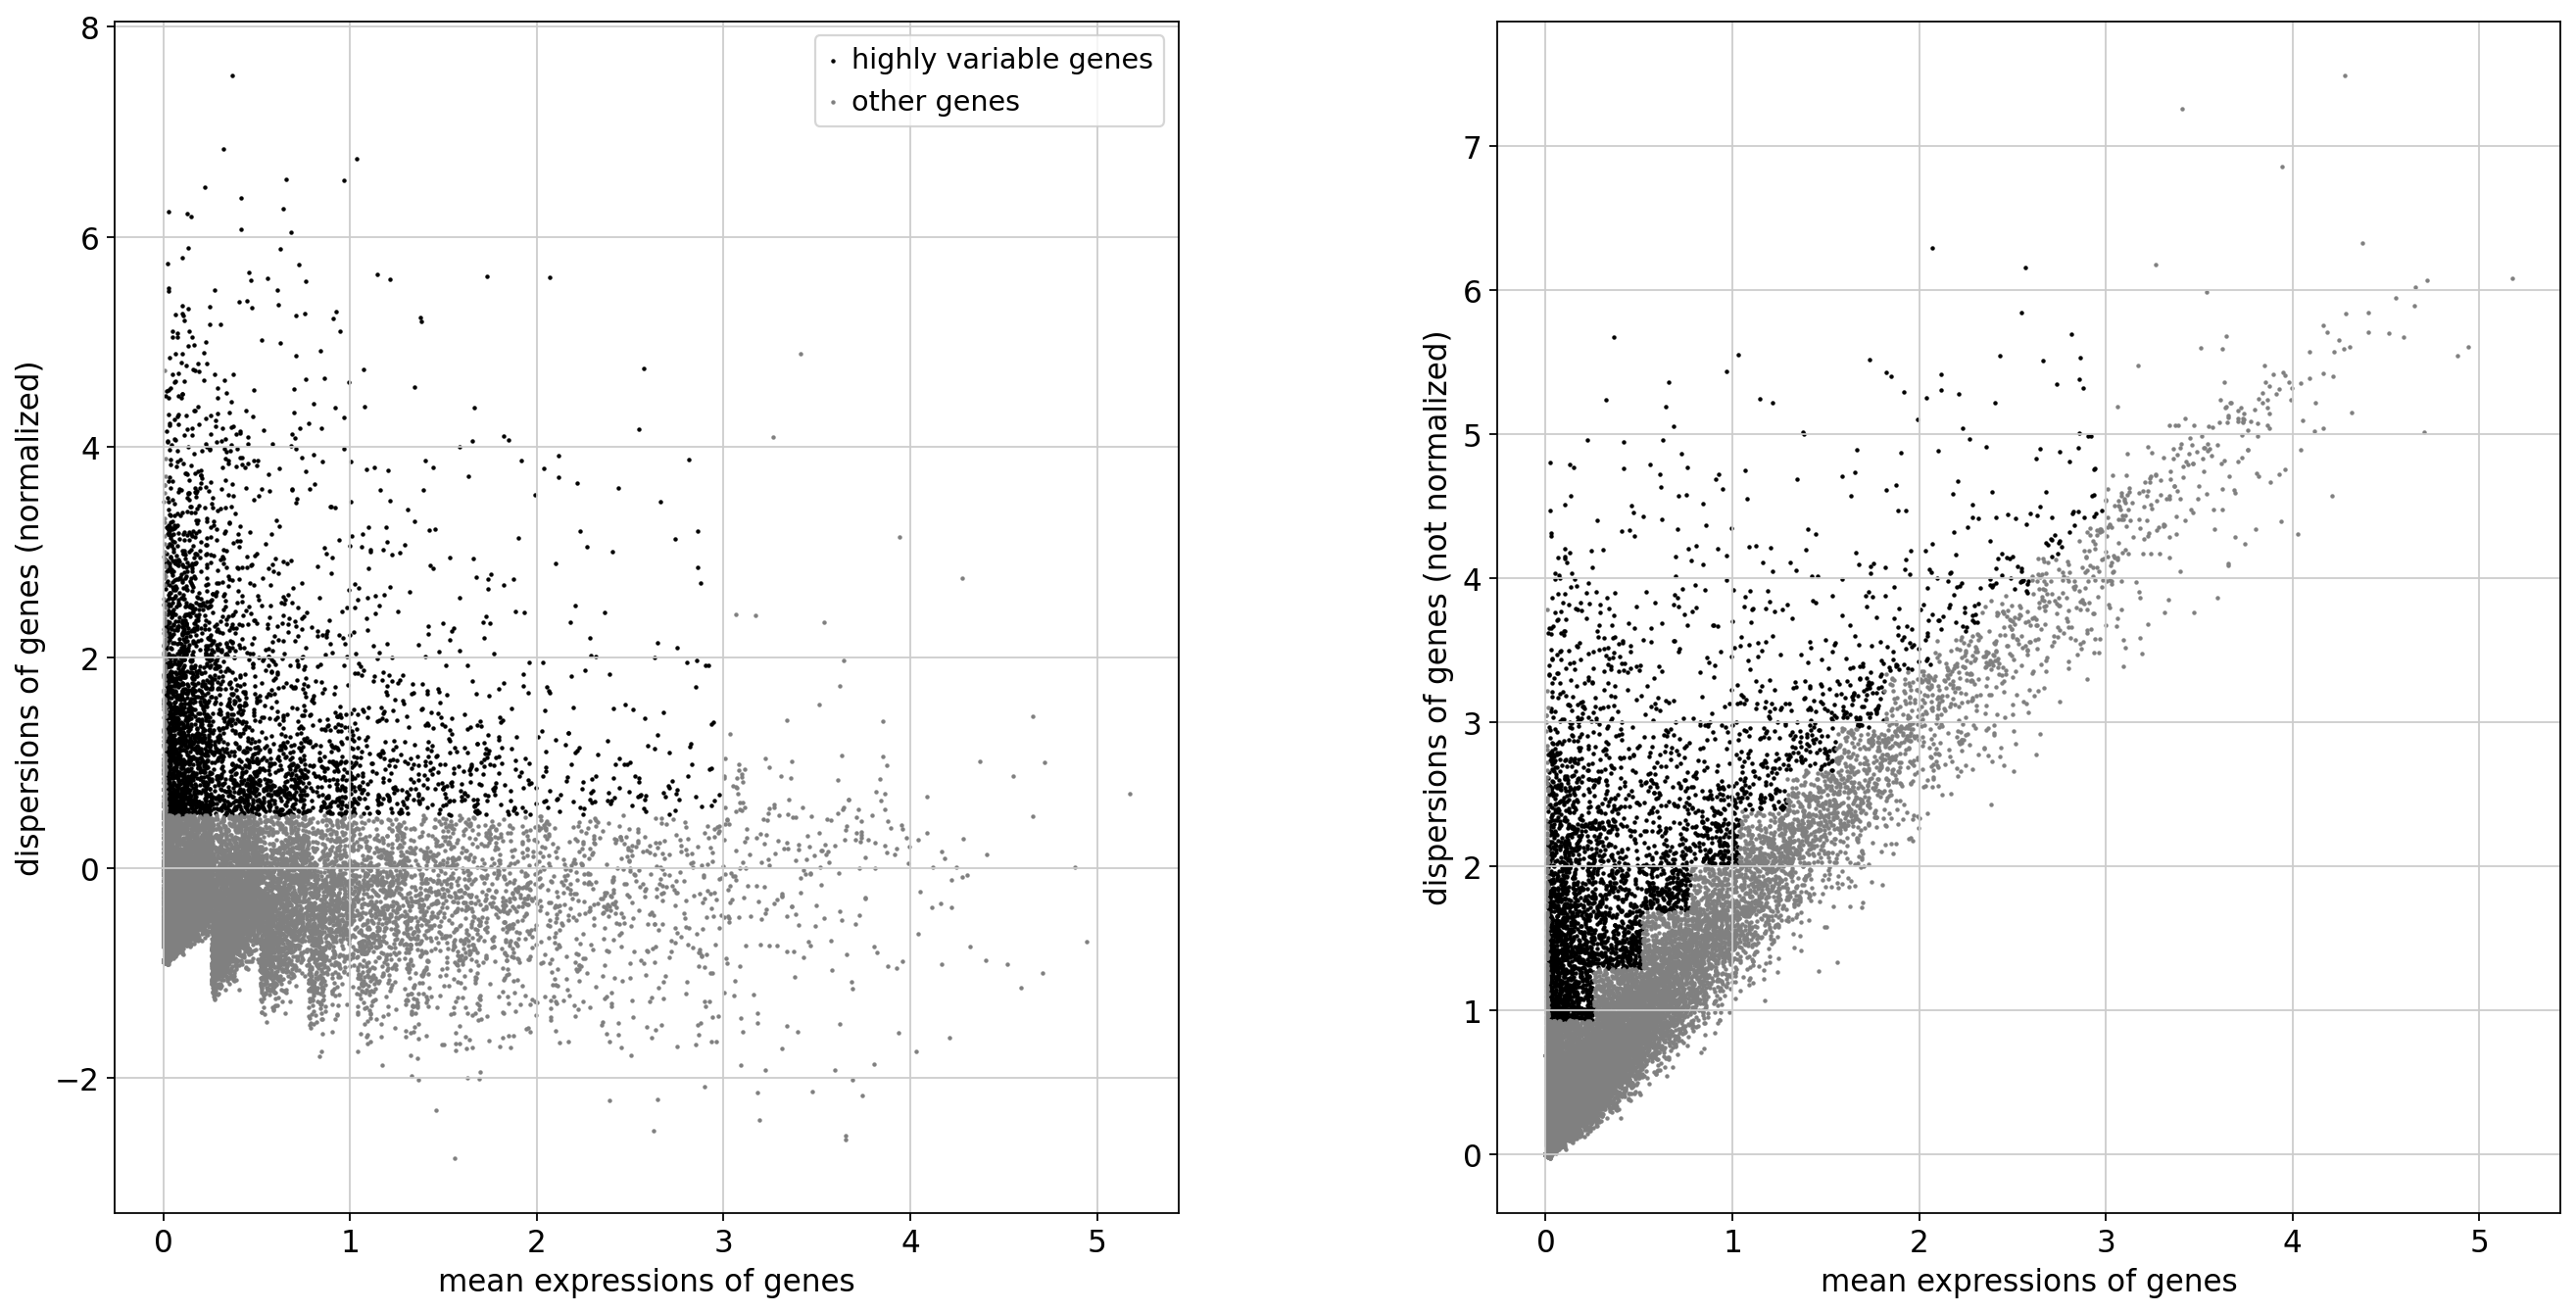

In [27]:
sc.pp.highly_variable_genes(secondary_sc_set, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(secondary_sc_set)


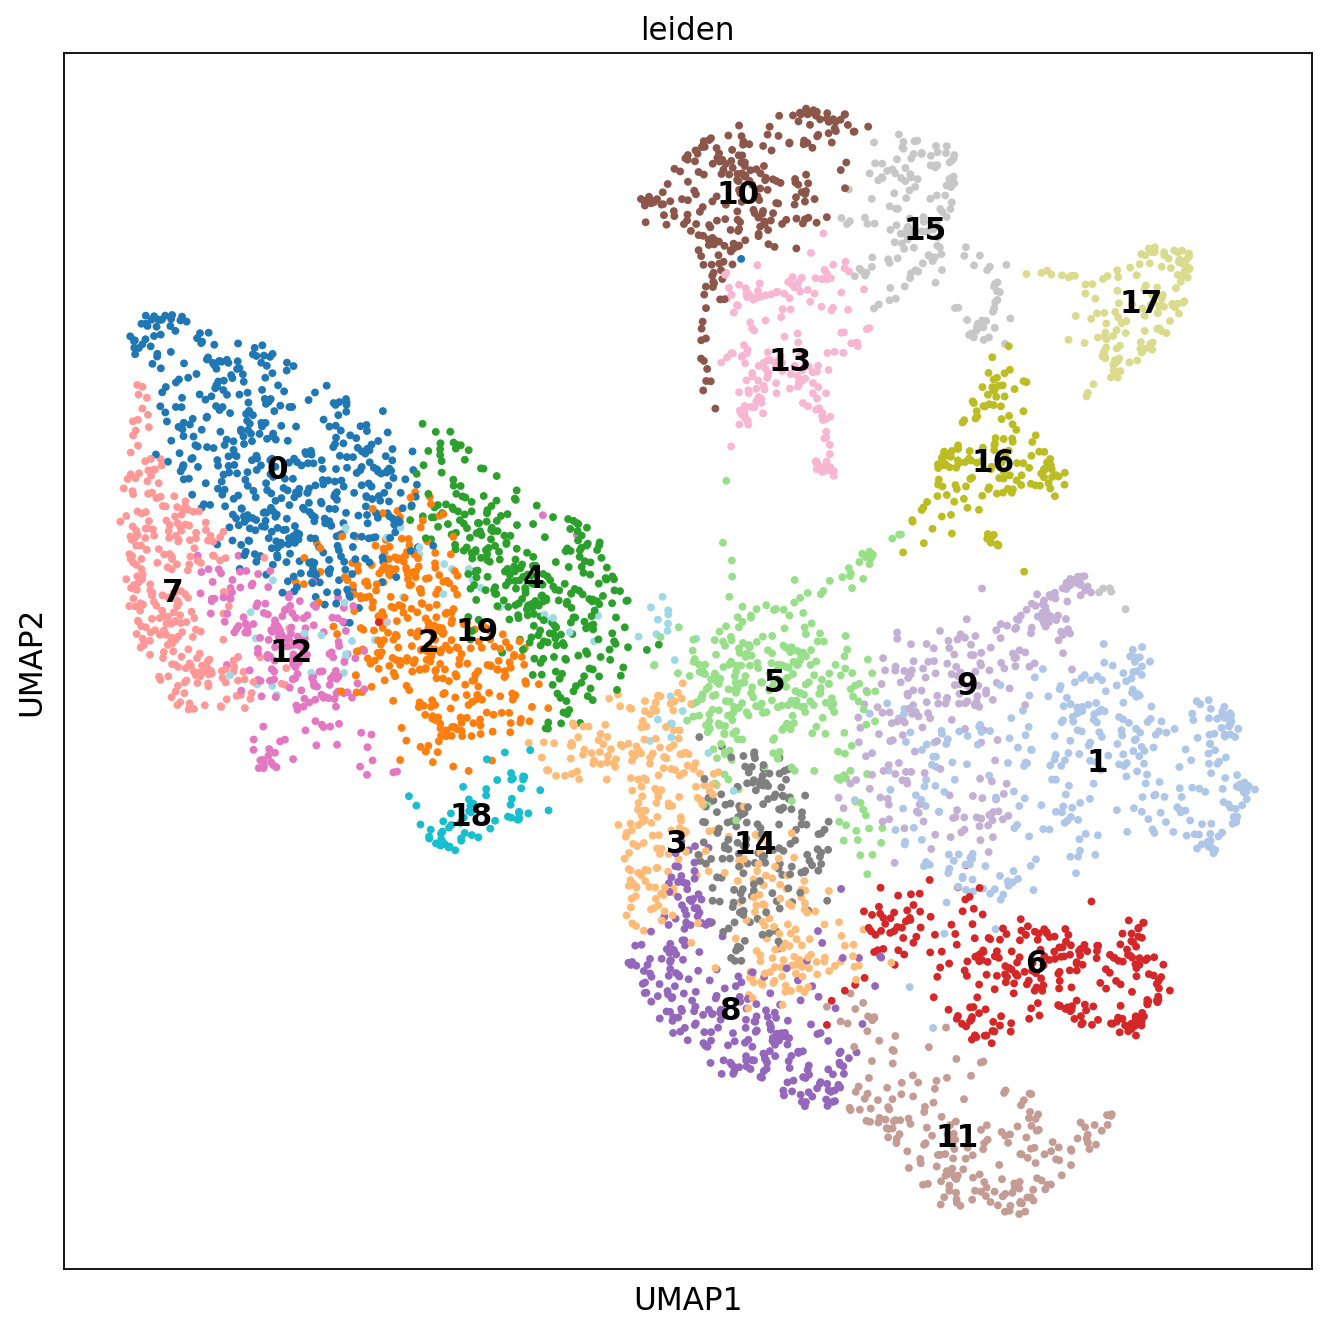

In [28]:
sc.tl.pca(secondary_sc_set, svd_solver='arpack', random_state= 331)
sc.pp.neighbors(secondary_sc_set, n_neighbors=20, n_pcs=50, random_state= 43)
sc.tl.umap(secondary_sc_set, random_state= 1154)
sc.tl.leiden(secondary_sc_set, random_state= 542)

sc.pl.umap(secondary_sc_set, color = 'leiden',palette= 'tab20', s=50, legend_loc='on data')

In [29]:
secondary_identity_dic = {"0":'Mature',
    '1':'Root Hair',
    "2":'Mature',
    '3':'Meristem',
    '4':'Mature',
    '5':'Root Hair',
    '6':'Root Hair',
    '7':'Mature',
    '8':'Meristem',
    '9':'Root Hair',
    '10':'Stele',
    '11':'Root Hair',
    '12':'Mature',
   '13':'Xylem',
    '14':'Meristem',
    '15':'Stele',
    '16':'Cortex',
    '17':'Endodermis',
    '18':'QC - Stem Cells',
    '19':'Mature'}

In [30]:
secondary_sc_set.obs['Cluster Identity'] = secondary_sc_set.obs['leiden'].map(secondary_identity_dic)
secondary_sc_set.obs

Barcode leiden Cluster Identity
Barcode                                           
AAACCTGCACTTAACG-1     NaN      9        Root Hair
AAACCTGCAGGACGTA-1     NaN      0           Mature
AAACCTGTCAGGTAAA-1     NaN      1        Root Hair
AAACGGGCAATAGAGT-1     NaN     11        Root Hair
AAACGGGCACTTGGAT-1     NaN     11        Root Hair
...                    ...    ...              ...
TTTGTCACACTGTTAG-2     NaN     18  QC - Stem Cells
TTTGTCACATCCTTGC-2     NaN      2           Mature
TTTGTCAGTTGTCTTT-2     NaN      9        Root Hair
TTTGTCATCACCGTAA-2     NaN      3         Meristem
TTTGTCATCGAATCCA-2     NaN     15            Stele

[4727 rows x 3 columns]

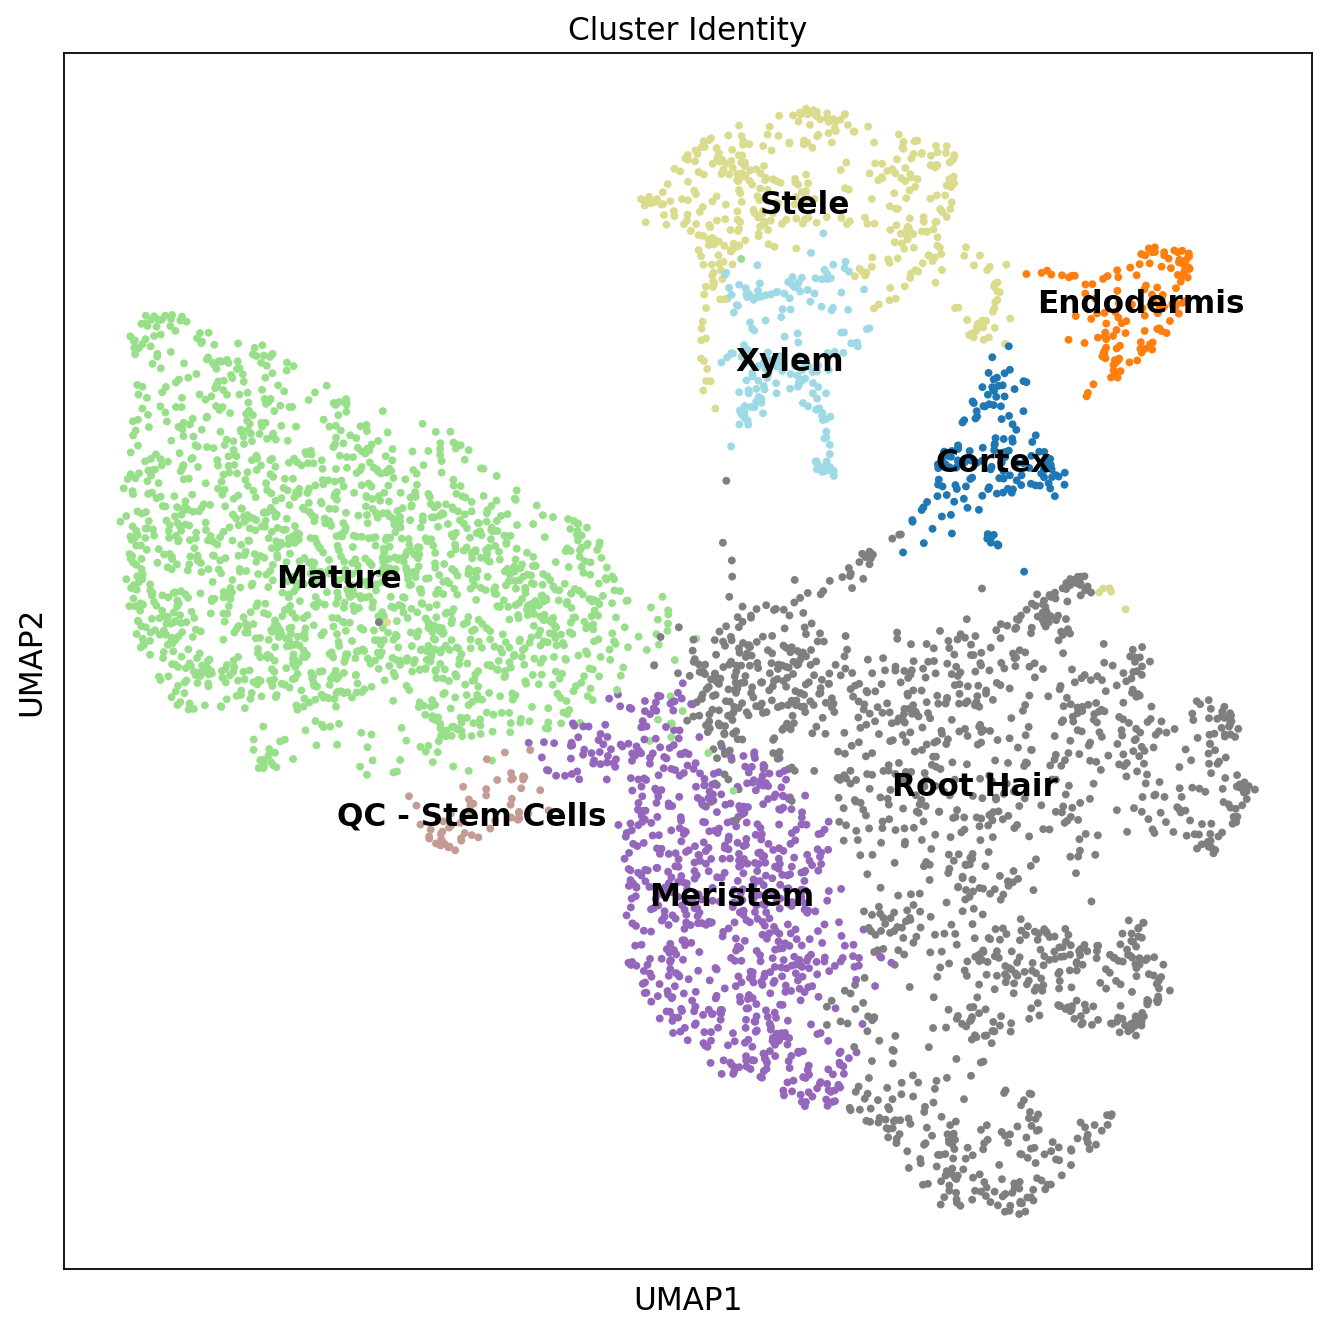

In [31]:
sc.pl.umap(secondary_sc_set, color = 'Cluster Identity',palette= 'tab20', s=50, legend_loc= 'on data')

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


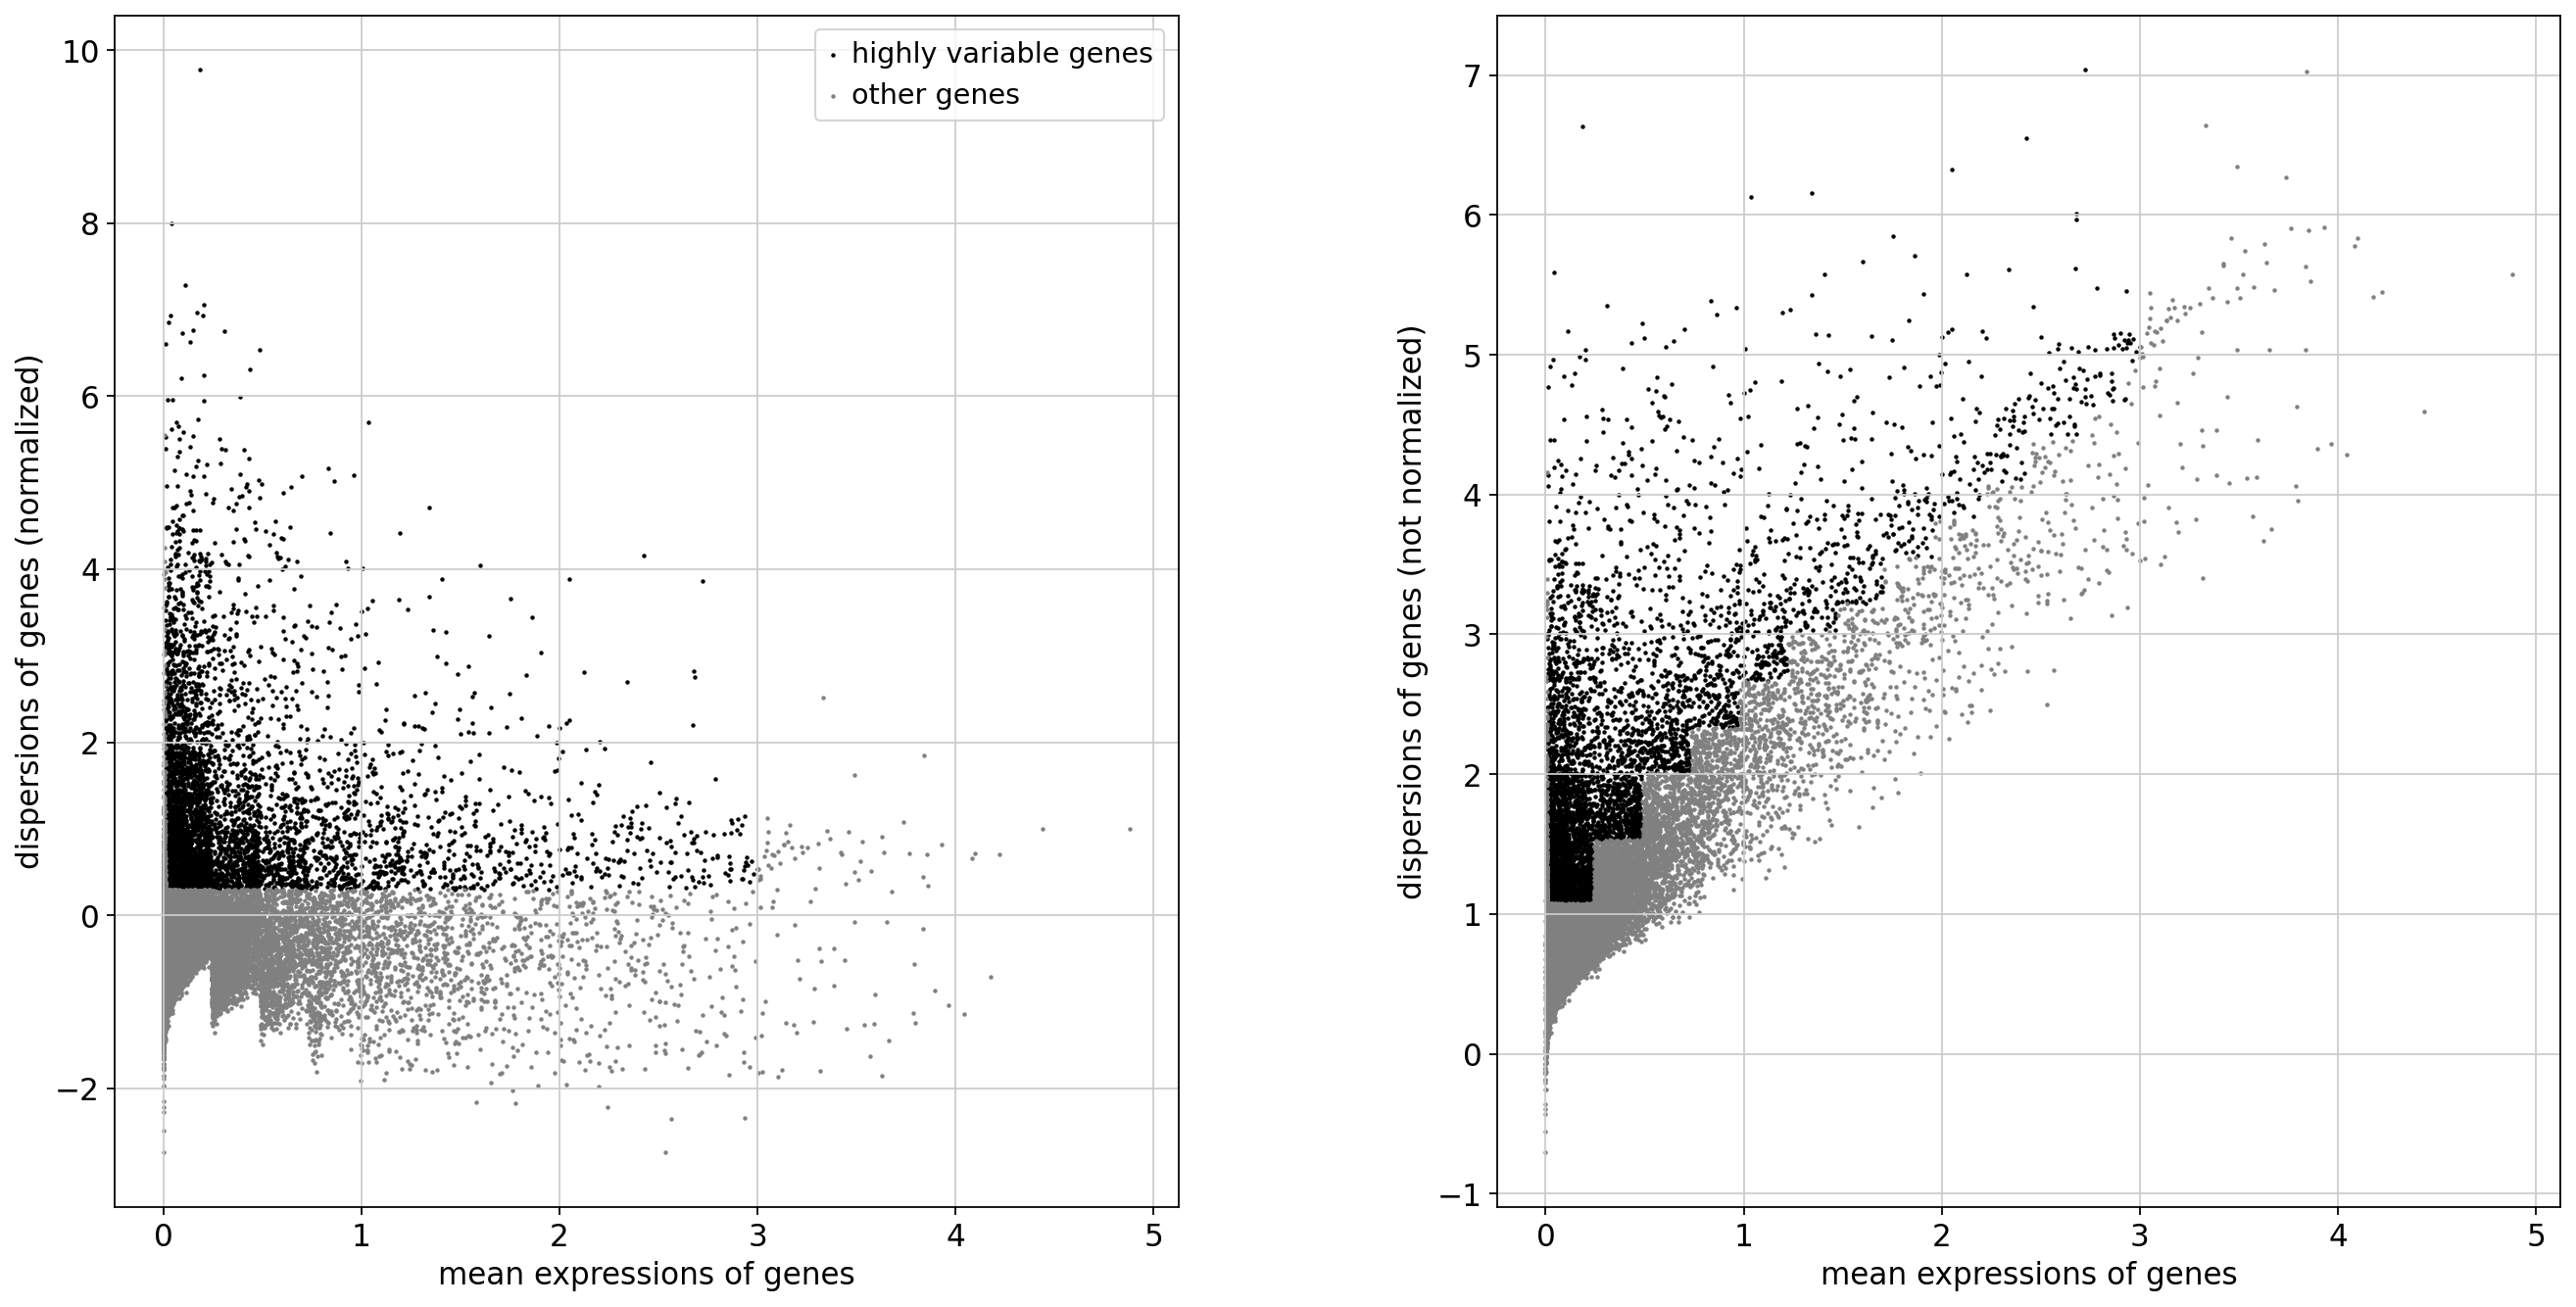

In [32]:
## External Scanpy Tutorial Docs Page Way 

concatenated_two_datasets = primary_Dataset.concatenate(secondary_sc_set, batch_key = 'Dataset', batch_categories = ['Primary','Secondary'])

sc.pp.highly_variable_genes(concatenated_two_datasets, min_mean=0.01, max_mean=3, min_disp=0.3) 
sc.pl.highly_variable_genes(concatenated_two_datasets)

#sc.tl.pca(concatendated_arabi_maize_dataset, svd_solver='arpack', random_state= 567)



In [33]:
concatenated_two_datasets.obs

Barcode leiden  cluster  \
Barcode                                                
AAACCTGAGAATTCCC-Primary         NaN      7     11.0   
AAACCTGAGGGCACTA-Primary         NaN      1      1.0   
AAACCTGAGTAATCCC-Primary         NaN     10      7.0   
AAACCTGAGTACGTTC-Primary         NaN     11     16.0   
AAACCTGAGTATTGGA-Primary         NaN      4     13.0   
...                              ...    ...      ...   
TTTGTCACACTGTTAG-2-Secondary     NaN     18      NaN   
TTTGTCACATCCTTGC-2-Secondary     NaN      2      NaN   
TTTGTCAGTTGTCTTT-2-Secondary     NaN      9      NaN   
TTTGTCATCACCGTAA-2-Secondary     NaN      3      NaN   
TTTGTCATCGAATCCA-2-Secondary     NaN     15      NaN   

                                          Cluster Identity    Dataset  
Barcode                                                                
AAACCTGAGAATTCCC-Primary             Stem Cell Niche -12 P    Primary  
AAACCTGAGGGCACTA-Primary      Sub-cell Stele - Discarded P    Primary  
AAACCTGAGTAATCCC-Primary                    Root Hair -8 P    Primary  
AAACCTGAGTACGTTC-Primary                  Root Hair - 17 P    Primary  
AAACCTGAGTATTGGA-Primary               Proximal Meristem P    Primary  
...                                                    ...        ...  
TTTGTCACACTGTTAG-2-Secondary               QC - Stem Cells  Secondary  
TTTGTCACATCCTTGC-2-Secondary                        Mature  Secondary  
TTTGTCAGTTGTCTTT-2-Secondary                     Root Hair  Secondary  
TTTGTCATCACCGTAA-2-Secondary                      Meristem  Secondary  
TTTGTCATCGAATCCA-2-Secondary                         Stele  Secondary  

[12422 rows x 5 columns]

[[0.         0.64184472]
 [0.         0.        ]]
Processing datasets Primary <=> Secondary


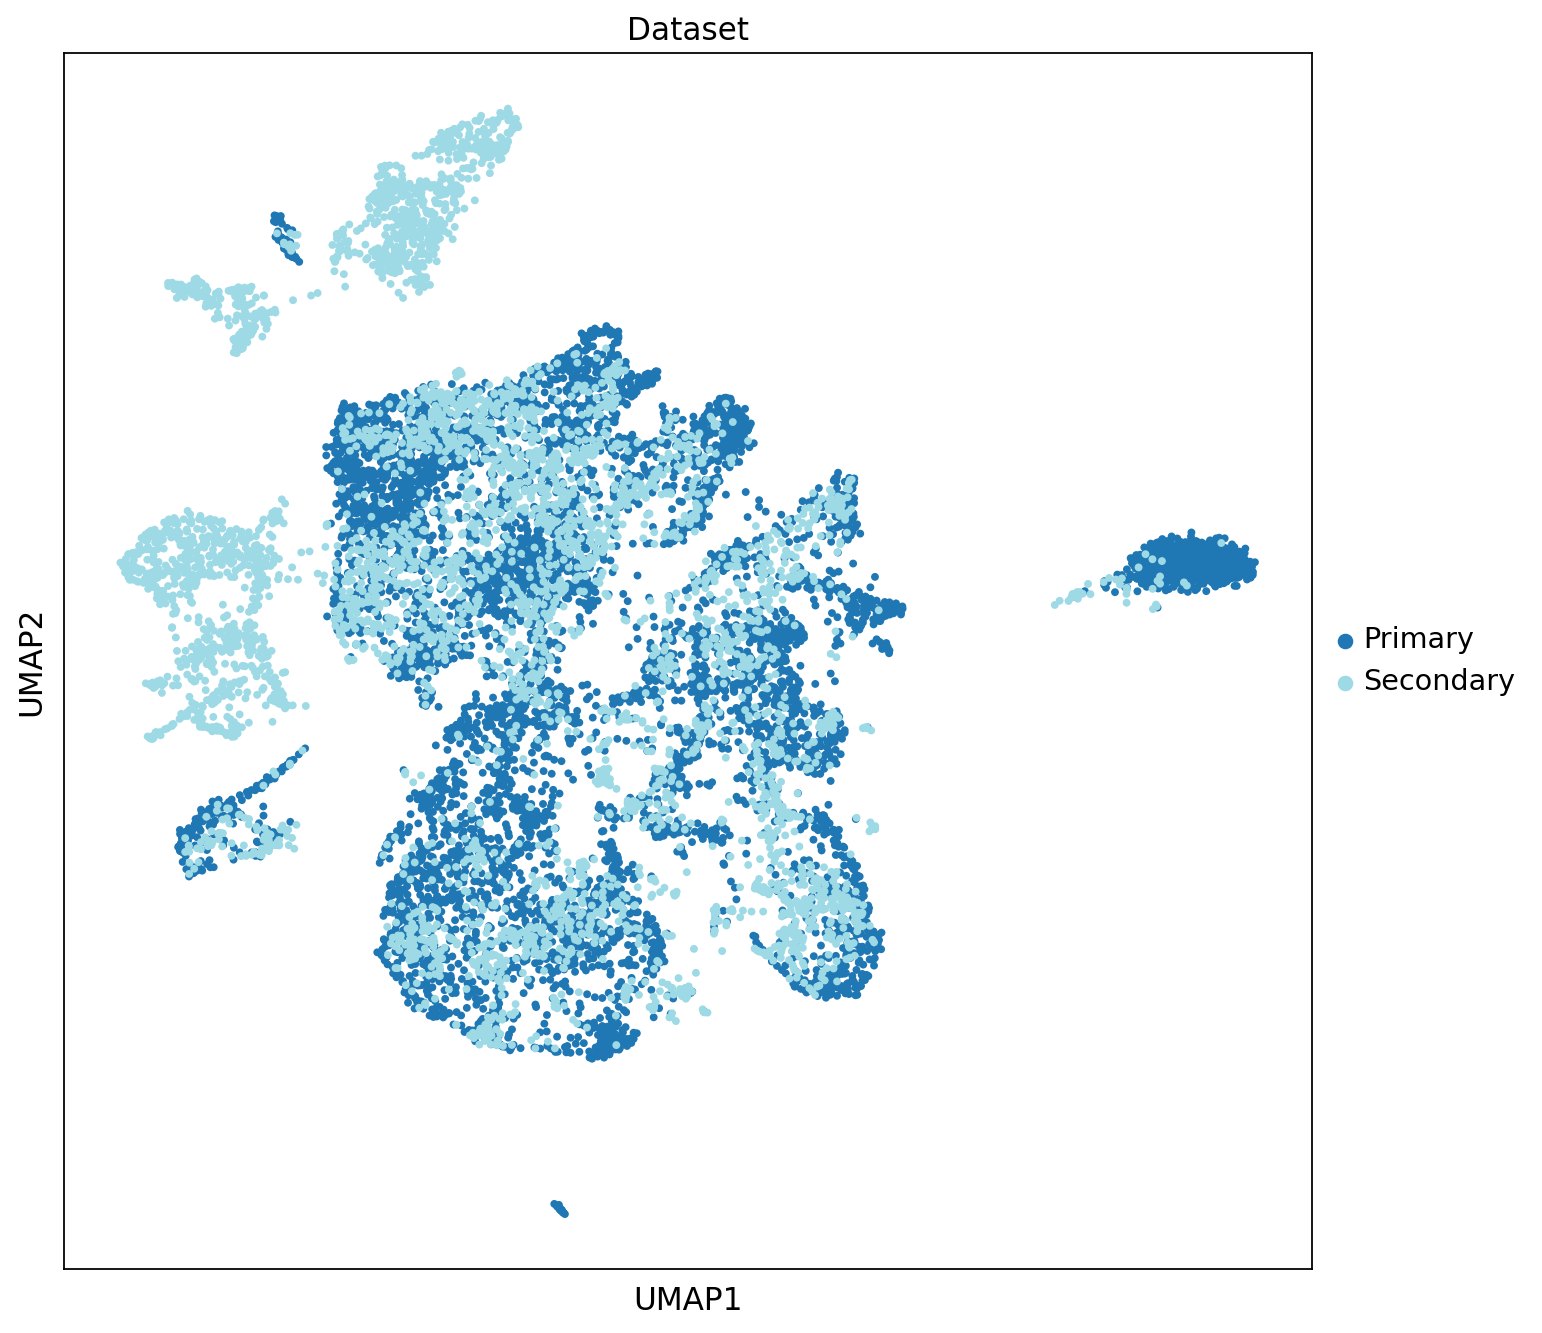

In [34]:
sc.external.pp.scanorama_integrate(concatenated_two_datasets, 'Dataset')

sc.tl.pca(secondary_sc_set, svd_solver='arpack', random_state= 331)
sc.pp.neighbors(concatenated_two_datasets, n_neighbors=20, n_pcs=50, random_state= 456, use_rep= 'X_scanorama' )
sc.tl.umap(concatenated_two_datasets, random_state= 973)
sc.tl.leiden(concatenated_two_datasets, random_state= 112)

sc.pl.umap(concatenated_two_datasets, color = ['Dataset'], palette= 'tab20', s=50)

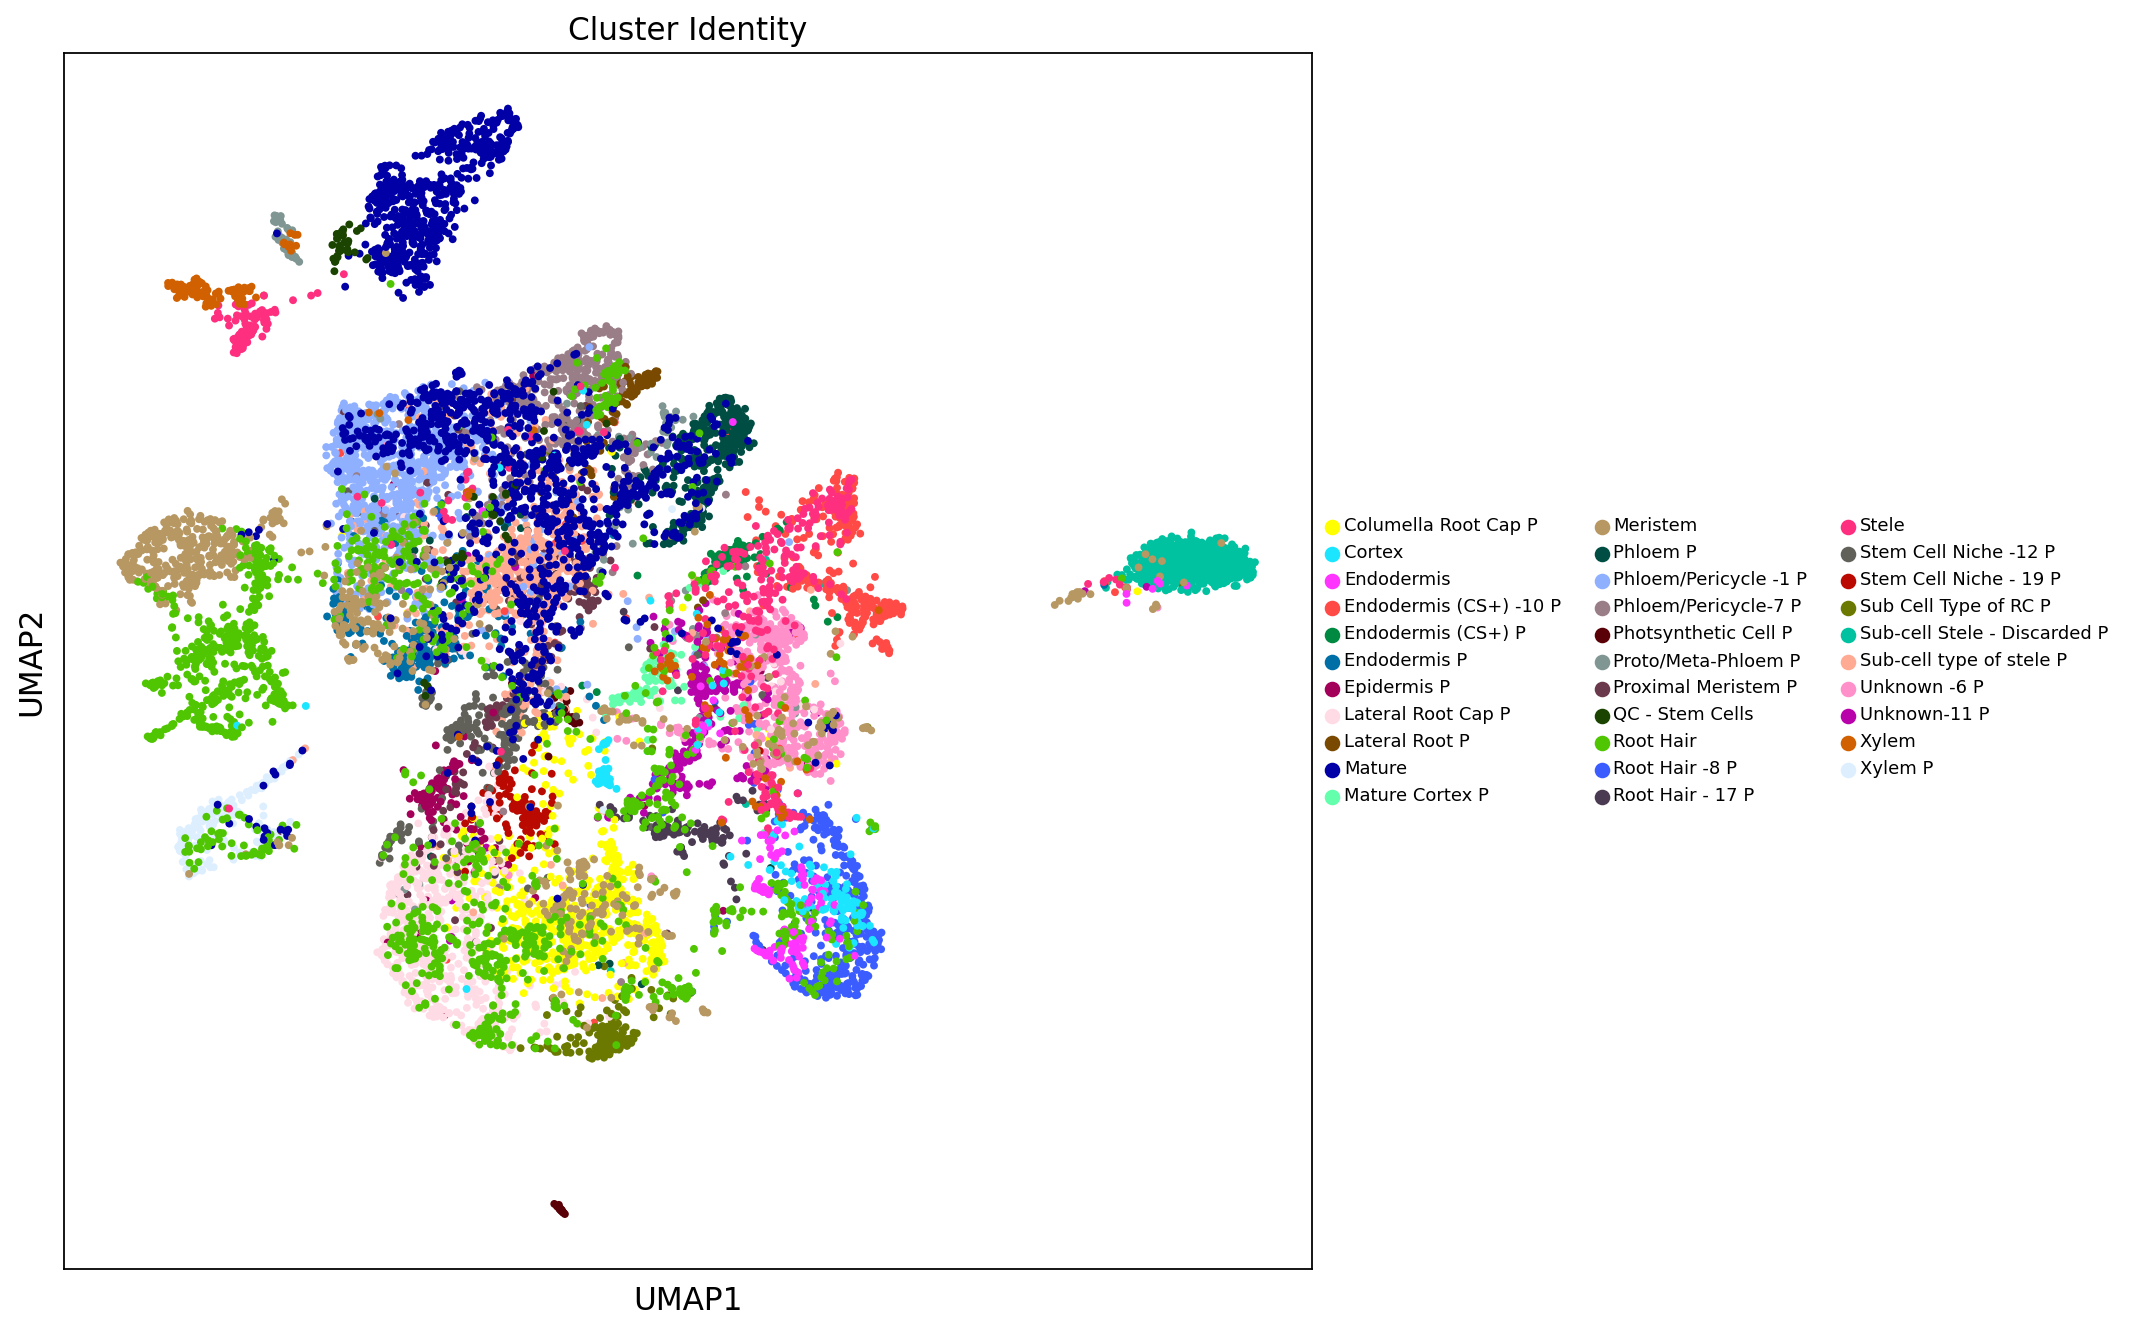

In [36]:
sc.pl.umap(concatenated_two_datasets, color = ['Cluster Identity'], s=50,legend_fontsize = 'xx-small', )

In [14]:
bad_values = umap_df.sort_values(by = 'Axis 1', ascending = False).head(6).index
single_cell_arabidopsis_root_4_datasets.obs.loc[bad_values]
good_obs = single_cell_arabidopsis_root_4_datasets.obs.loc[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(bad_values)]

In [15]:
single_cell_arabidopsis_root_4_datasets  = single_cell_arabidopsis_root_4_datasets[good_obs.index,:]
single_cell_arabidopsis_root_4_datasets

View of AnnData object with n_obs × n_vars = 16635 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'
    obsm: 'X_umap'

In [39]:
single_cell_arabidopsis_root_4_datasets.obs.loc[single_cell_arabidopsis_root_4_datasets.obs['Study Number'] ==4]

Cell Type  Study Number  Batch Cluster  Meta Cluster
TATCTGATTGGC_A         16             4             27             1
GAATTACCTCTT_A         29             4             40             2
ACAATCTCGACA_A         29             4             40             2
TCGGAGCCCTGA_A         16             4             27             1
CTTTGGCTGAGC_A         16             4             27             1
...                   ...           ...            ...           ...
AGTTATAGACTN_B         29             4             40             2
AGGTTGCTATTC_B         29             4             40             2
TGGGATTAAAAT_B         29             4             40             2
CTGCAATTTTGC_B         17             4             28             1
GTGAAAGCGTGC_B         18             4             29             5

[4025 rows x 4 columns]

In [31]:
primary_Dataset.obs

Barcode
Barcode                 
AAACCTGAGAATTCCC     NaN
AAACCTGAGGGCACTA     NaN
AAACCTGAGTAATCCC     NaN
AAACCTGAGTACGTTC     NaN
AAACCTGAGTATTGGA     NaN
...                  ...
TTTGTCATCAAGGCTT     NaN
TTTGTCATCCCACTTG     NaN
TTTGTCATCCTGCCAT     NaN
TTTGTCATCCTTCAAT     NaN
TTTGTCATCTCTGCTG     NaN

[7695 rows x 1 columns]

In [32]:
secondary_sc_set.obs

Barcode
Barcode                   
AAACCTGCACTTAACG-1     NaN
AAACCTGCAGGACGTA-1     NaN
AAACCTGTCAGGTAAA-1     NaN
AAACGGGCAATAGAGT-1     NaN
AAACGGGCACTTGGAT-1     NaN
...                    ...
TTTGTCACACTGTTAG-2     NaN
TTTGTCACATCCTTGC-2     NaN
TTTGTCAGTTGTCTTT-2     NaN
TTTGTCATCACCGTAA-2     NaN
TTTGTCATCGAATCCA-2     NaN

[4727 rows x 1 columns]